In [3]:
import joblib
import pandas as pd
import os

# Detectar ruta correcta del notebook o script
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))  # Script .py
except NameError:
    BASE_DIR = os.getcwd()  # Notebook Jupyter o entorno interactivo

ruta_modelo = os.path.join(BASE_DIR, "modelos", "random_forest.pkl")
ruta_columnas = os.path.join(BASE_DIR, "modelos", "columnas_entrenamiento.pkl")

# Cargar modelo y columnas
modelo = joblib.load(ruta_modelo)
columnas = joblib.load(ruta_columnas)

# Crear base con ceros
datos = {col: 0 for col in columnas}

# Perfil fijo
# perfil_fijo = {
#     'YearsCodePro': 5,
#     'EdLevel_Master': 1,
#     'Employment_Employed, full-time': 1,
#     'DevType_Developer, full-stack': 1,
#     'RemoteWork_Remote': 1,
#     'OrgSize_100 to 499 employees': 1,
#     'AISelect_Yes, I use AI tools regularly': 1,
# }
perfil_fijo = {
    'YearsCodePro': 1,
    'EdLevel_Secondary school': 1,  # sin título universitario
    'Employment_Employed, full-time': 1,
    'DevType_Developer, full-stack': 1,
    'RemoteWork_Remote': 1,
    'OrgSize_Less than 10 employees': 1,
    'AISelect_No': 1,
}


# Aplicar valores fijos
for clave, valor in perfil_fijo.items():
    if clave in datos:
        datos[clave] = valor

# Países a comparar
paises = {
    "United States of America": "Country_United States of America",
    "Algeria": "Country_Algeria",
    "Spain": "Country_Spain",
    "India": "Country_India",
}

# Predecir salario por país
for nombre, columna_pais in paises.items():
    if columna_pais in columnas:
        datos_pais = datos.copy()
        datos_pais[columna_pais] = 1
        salario = modelo.predict([pd.Series(datos_pais)])[0]
        print(f"💰 {nombre}: ${salario:,.2f}")
    else:
        print(f"⚠️ {nombre} no fue usado en el modelo (columna ausente).")


💰 United States of America: $82,031.84
💰 Algeria: $9,457.85
💰 Spain: $26,202.79
💰 India: $10,751.18


c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature nam

c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\erroc\OneDrive\Desktop\practicas\data science\proyecto-prediccion\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature nam

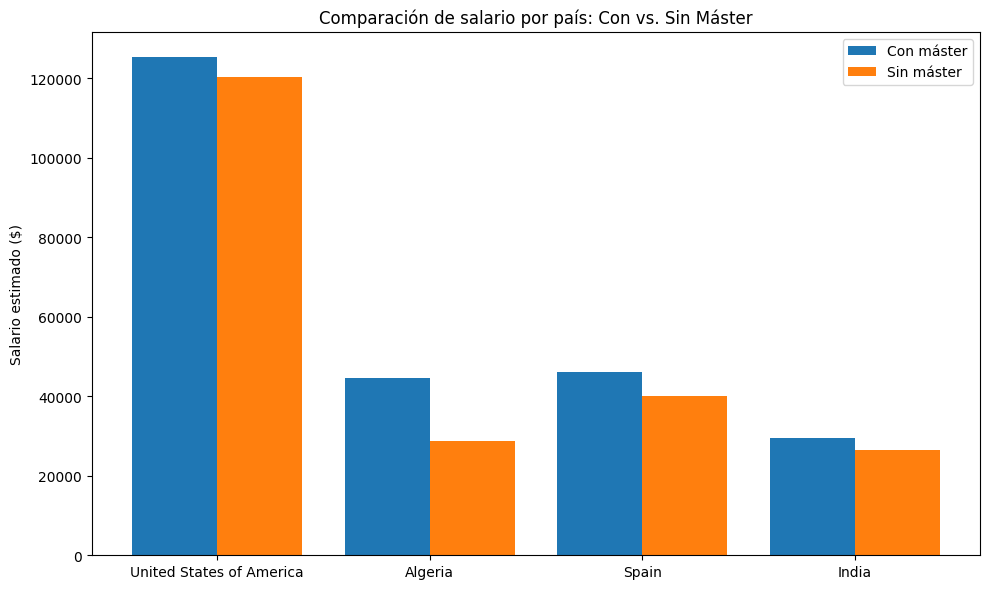

In [4]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import os

# Cargar modelo y columnas
BASE_DIR = os.getcwd()
modelo = joblib.load(os.path.join(BASE_DIR, "modelos", "random_forest.pkl"))
columnas = joblib.load(os.path.join(BASE_DIR, "modelos", "columnas_entrenamiento.pkl"))

# Perfil base común
perfil_base = {
    'YearsCodePro': 5,
    'Employment_Employed, full-time': 1,
    'DevType_Developer, full-stack': 1,
    'RemoteWork_Remote': 1,
    'OrgSize_100 to 499 employees': 1,
    'AISelect_Yes, I use AI tools regularly': 1,
}

# Lista de países
paises = {
    "United States of America": "Country_United States of America",
    "Algeria": "Country_Algeria",
    "Spain": "Country_Spain",
    "India": "Country_India",
}

# Comparar salarios con y sin máster
salarios_con_master = []
salarios_sin_master = []

for nombre, columna_pais in paises.items():
    for edlevel in [1, 0]:  # 1 = con máster, 0 = sin máster
        datos = {col: 0 for col in columnas}
        for clave, valor in perfil_base.items():
            if clave in datos:
                datos[clave] = valor
        if 'EdLevel_Master' in datos:
            datos['EdLevel_Master'] = edlevel
        if columna_pais in datos:
            datos[columna_pais] = 1

        salario = modelo.predict([pd.Series(datos)])[0]
        if edlevel == 1:
            salarios_con_master.append(salario)
        else:
            salarios_sin_master.append(salario)

# Gráfica
labels = list(paises.keys())
x = range(len(labels))
plt.figure(figsize=(10, 6))
plt.bar(x, salarios_con_master, width=0.4, label="Con máster", align='center')
plt.bar([i + 0.4 for i in x], salarios_sin_master, width=0.4, label="Sin máster", align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Salario estimado ($)")
plt.title("Comparación de salario por país: Con vs. Sin Máster")
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Semilla para reproducibilidad
np.random.seed(42)

# Variable independiente (X)
X = np.arange(1, 21).reshape(-1, 1)  # 20 puntos de 1 a 20

# Variable dependiente (y) con algo de ruido
y_true = 2 * X.flatten() + 1 + np.random.normal(0, 2, size=20)

# Introducimos errores grandes (outliers)
y_true[5] += 20   # gran error positivo
y_true[15] -= 25  # gran error negativo


# Entrenamos modelo de regresión lineal
model = LinearRegression()
model.fit(X, y_true)

# Predicciones del modelo
y_pred = model.predict(X)


In [3]:
# Errores individuales
errors = y_true - y_pred
abs_errors = np.abs(errors)

# Métricas
mae = np.mean(abs_errors)
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
max_abs_error = np.max(abs_errors)
std_error = np.std(errors)
percentile_90 = np.percentile(abs_errors, 90)

# Mostrar métricas
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Máximo error absoluto:", max_abs_error)
print("Desviación estándar del error:", std_error)
print("Percentil 90 del error absoluto:", percentile_90)

# Mostrar errores individuales
print("Errores individuales:")
for i in range(len(y_true)):
    print(f"X={X[i][0]:2d}, y_real={y_true[i]:6.2f}, y_pred={y_pred[i]:6.2f}, "
          f"error={errors[i]:6.2f}, abs_error={abs_errors[i]:6.2f}")



MAE: 3.8402254625120507
MSE: 46.653287052896175
RMSE: 6.830321152983671
Máximo error absoluto: 22.55518665713645
Desviación estándar del error: 6.830321152983671
Percentil 90 del error absoluto: 6.52119403094889
Errores individuales:
X= 1, y_real=  3.99, y_pred=  7.55, error= -3.56, abs_error=  3.56
X= 2, y_real=  4.72, y_pred=  9.01, error= -4.28, abs_error=  4.28
X= 3, y_real=  8.30, y_pred= 10.47, error= -2.17, abs_error=  2.17
X= 4, y_real= 12.05, y_pred= 11.93, error=  0.12, abs_error=  0.12
X= 5, y_real= 10.53, y_pred= 13.38, error= -2.85, abs_error=  2.85
X= 6, y_real= 32.53, y_pred= 14.84, error= 17.69, abs_error= 17.69
X= 7, y_real= 18.16, y_pred= 16.30, error=  1.86, abs_error=  1.86
X= 8, y_real= 18.53, y_pred= 17.76, error=  0.77, abs_error=  0.77
X= 9, y_real= 18.06, y_pred= 19.22, error= -1.16, abs_error=  1.16
X=10, y_real= 22.09, y_pred= 20.68, error=  1.41, abs_error=  1.41
X=11, y_real= 22.07, y_pred= 22.14, error= -0.06, abs_error=  0.06
X=12, y_real= 24.07, y_pred= 

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score




# Datos de entrenamiento
X_entreno = np.array([[1], [2], [3], [4], [5]])
y_entreno = np.array([3, 6, 9, 12, 15])  # y = 3x

# Entrenar modelo
model = LinearRegression()
model.fit(X_entreno, y_entreno)

# Nuevos datos para probar
X_nuevo = np.array([[6], [7], [8]])
y_real_nuevo = np.array([18, 21, 24])  # valores reales esperados

# Predicciones
y_pred_nuevo = model.predict(X_nuevo)

# Errores
errores = y_real_nuevo - y_pred_nuevo
abs_errores = np.abs(errores)

# Métricas
mae = np.mean(abs_errores)
mse = np.mean(errores ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_real_nuevo, y_pred_nuevo)

# Resultados
print("Datos nuevos:", X_nuevo.flatten())
print("Valores reales:", y_real_nuevo)
print("Predicciones:  ", y_pred_nuevo)
print("Errores:       ", errores)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)



Datos nuevos: [6 7 8]
Valores reales: [18 21 24]
Predicciones:   [18. 21. 24.]
Errores:        [-3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
MAE: 3.552713678800501e-15
MSE: 1.262177448353619e-29
RMSE: 3.552713678800501e-15
R2: 1.0


In [ ]:
import pandas as pd

df = pd.read_csv("data/datos_limpios_modelo.csv")
print(df.columns.tolist())



['YearsCodePro', 'ConvertedCompYearly', 'Country_Albania', 'Country_Algeria', 'Country_Andorra', 'Country_Angola', 'Country_Antigua and Barbuda', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Azerbaijan', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Barbados', 'Country_Belarus', 'Country_Belgium', 'Country_Benin', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Brazil', 'Country_Brunei Darussalam', 'Country_Bulgaria', 'Country_Burkina Faso', 'Country_Burundi', 'Country_Cambodia', 'Country_Cameroon', 'Country_Canada', 'Country_Cape Verde', 'Country_Central African Republic', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Congo, Republic of the...', 'Country_Costa Rica', 'Country_Croatia', 'Country_Cuba', 'Country_Cyprus', 'Country_Czech Republic', "Country_Côte d'Ivoire", "Country_Democratic People's Republic of Korea", 'Country_Democratic Republic of the Congo', 'Country_

In [3]:
import joblib

columnas = joblib.load("modelos/columnas_entrenamiento.pkl")
paises = [col for col in columnas if "Country_" in col]
print(paises)



['Country_Albania', 'Country_Algeria', 'Country_Andorra', 'Country_Angola', 'Country_Antigua and Barbuda', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Azerbaijan', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Barbados', 'Country_Belarus', 'Country_Belgium', 'Country_Benin', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Brazil', 'Country_Brunei Darussalam', 'Country_Bulgaria', 'Country_Burkina Faso', 'Country_Burundi', 'Country_Cambodia', 'Country_Cameroon', 'Country_Canada', 'Country_Cape Verde', 'Country_Central African Republic', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Congo, Republic of the...', 'Country_Costa Rica', 'Country_Croatia', 'Country_Cuba', 'Country_Cyprus', 'Country_Czech Republic', "Country_Côte d'Ivoire", "Country_Democratic People's Republic of Korea", 'Country_Democratic Republic of the Congo', 'Country_Denmark', 'Country_Dominican Republic',